<a href="https://colab.research.google.com/github/iotsync2420/deep_learning/blob/main/FASHION_MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [236]:
torch.manual_seed(42)

In [237]:
df=pd.read_csv('fmnist_small.csv')
df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


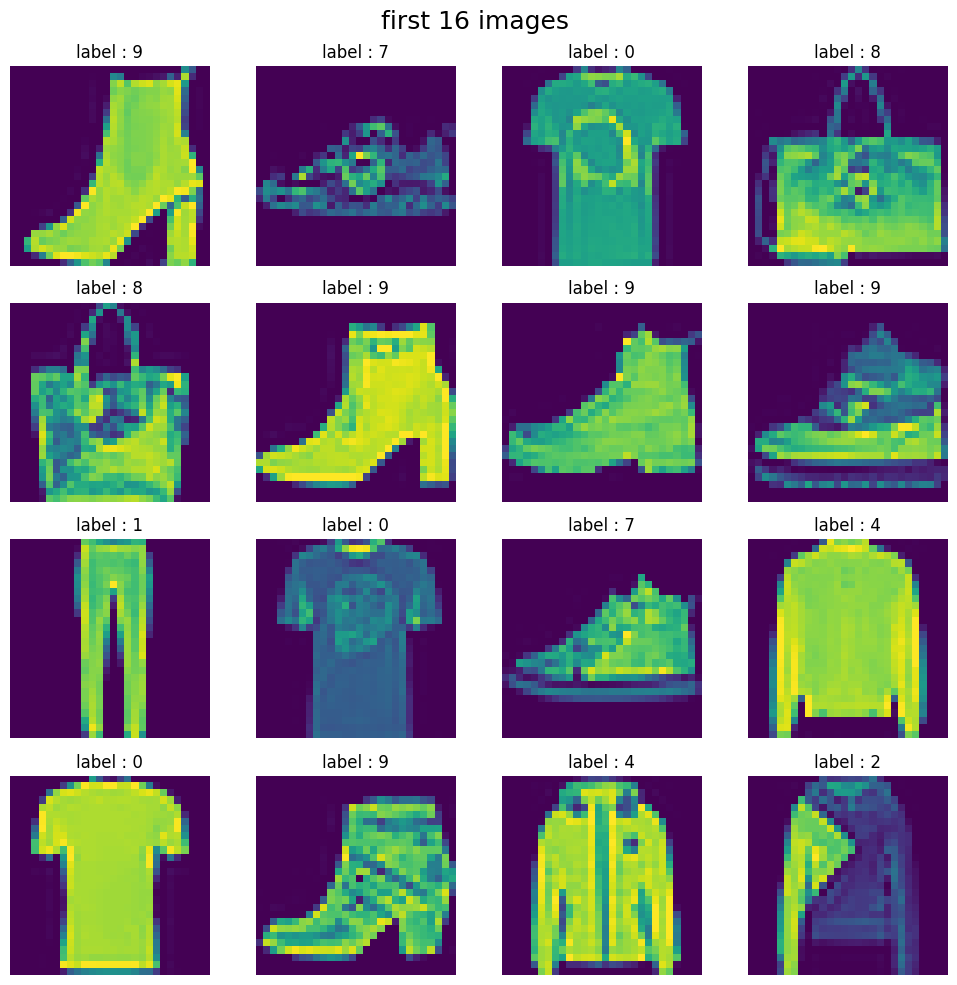

In [238]:
fig , axes =plt.subplots(nrows=4,ncols=4,figsize=(10,10))
fig.suptitle("first 16 images ", fontsize=18)

for i , ax in enumerate(axes.flat):
    img= df.iloc[i,1:].values.reshape(28,28) # image reshaping into 28x28  (imp:df.iloc.values.shape will show these images )
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"label : {df.iloc[i,0]}")

plt.tight_layout()
plt.show()


In [239]:
X=df.iloc[:,1:].values #all rows and first column onwards(features)
y=df.iloc[:,0].values # all rows first column(targets)

#train test split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)


#scaling the features
X_train=X_train/255.0 # 255 pixels are there and we basically want that values stay in range 0 and 1
X_test=X_test/255.0 #for proper scaling , division by max value is done

X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [240]:
 # datset class
class MyDataset(Dataset):

  def __init__(self,data,targets):
    self.data=torch.tensor(data,dtype=torch.float32)
    self.targets=torch.tensor(targets,dtype=torch.long)

  def __len__(self):
    return len(self.data)
  def __getitem__(self, index) :
    return self.data[index], self.targets[index]


In [241]:
train_dataset = MyDataset(X_train, y_train)

In [242]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [243]:
test_dataset = MyDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [249]:
#NN class

class MyNN(nn.Module):
  def __init__(self,num_features):

    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128), # input layer to hidden layer 1
        nn.ReLU(),
        nn.Linear(128,64),# hidden layer 1 to hidden layer 2
        nn.ReLU(),
        nn.Linear(64,10) # hidden layer 2 to output
    )

    def forward(self,x):
      return self.model(x)



In [245]:
#training pipeline

epochs=100
learning_rate=0.1


In [246]:
#create object of NN class

model=MyNN(X_train.shape[1])

#loss function
criterion=nn.CrossEntropyLoss()

#optimizer
optimizer=optim.SGD(model.parameters(),lr=learning_rate)




In [247]:
len(train_loader)

75

In [248]:
#training loop
for epoch in range(epochs):

  total_epoch_loss=0

  for batch_features, batch_labels in train_loader :

    #forward pass
    outputs= model(batch_features)

    #loss calculations
    loss=criterion(outputs,batch_labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update
    optimizer.step()

    total_epoch_loss += loss.item()
  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.6442172074317931
Epoch: 2 , Loss: 0.9228938269615173
Epoch: 3 , Loss: 0.7810722343126932
Epoch: 4 , Loss: 0.6865317821502686
Epoch: 5 , Loss: 0.6385788853963216
Epoch: 6 , Loss: 0.5826328301429748
Epoch: 7 , Loss: 0.556782173315684
Epoch: 8 , Loss: 0.5279252628485361
Epoch: 9 , Loss: 0.5011282893021901
Epoch: 10 , Loss: 0.4925721691052119
Epoch: 11 , Loss: 0.46334261655807496
Epoch: 12 , Loss: 0.4693782216310501
Epoch: 13 , Loss: 0.42871190031369527
Epoch: 14 , Loss: 0.4251930969953537
Epoch: 15 , Loss: 0.39448946992556255
Epoch: 16 , Loss: 0.4031505590677261
Epoch: 17 , Loss: 0.3765400765339533
Epoch: 18 , Loss: 0.3678211053212484
Epoch: 19 , Loss: 0.35889905800422034
Epoch: 20 , Loss: 0.3432086149851481
Epoch: 21 , Loss: 0.34271817286809286
Epoch: 22 , Loss: 0.32998157183329263
Epoch: 23 , Loss: 0.31832168142000833
Epoch: 24 , Loss: 0.31443997522195183
Epoch: 25 , Loss: 0.30276435653368633
Epoch: 26 , Loss: 0.2945211269458135
Epoch: 27 , Loss: 0.2889769389232
Epoch

In [250]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [251]:
#evaluation code
correct=0
total=0
with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs=model(batch_features)
    _,predicted=torch.max(outputs.data,1)

    total += batch_labels.shape[0]
    correct += (predicted==batch_labels).sum().item()

print(f'Accuracy: {100*correct/total}')


Accuracy: 82.75
